# Nearest Neighbor as a Bridge to Regression

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.

Last Update 3/03/2022

**The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*



In [21]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

# Nearest neighbor classification (Again)

Recall the nearest neighbor classifier:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label
```

## Have We Mentioned Regression

So far our attention has been solely focused on a forced choice between $k$ labels. While many problems are of this kind, there is a different type of problem that is often described using a single term: **regression**

Shortly we will use our knowledge of nearest neighbors algorithms to present a slightly non-conventional introduction to regresion. But first, here is the essential distinction between a classification versus a regression problem. 

The most succinct mathematical definition of a classification problem of the kind we have been studying goes as follows.

**Classification**: Learn a mapping of from *feature vectors* to *labels*.  A bit more formally, it is assumed there is an unkown function:

$$ f  : \mathbb{R}^d \longrightarrow \mathbb{C}   $$

The domain of the function is $\mathbb{R}^d$, i.e. a real-valued point in $d$ dimensions. The range of the funciton consists of a set of discrete labels $\mathbb{C}$. For example, for a $k = 2$ problem with two classes labeled *cat* versus *dog*:  

$$  \mathbb{C} = \left\{ \hbox{cat}, \hbox{dog} \right\} $$

However, as we've already seen, machine learning folks are happy to replace labels with integers, essentially creating an arbitray mapping from labels to integers.

$$ \begin{eqnarray}
   \hbox{cat} & \rightarrow & 0 \\
   \hbox{dog} & \rightarrow & 1
   \end{eqnarray}
$$

With this mapping agreed upon the problem now is expressed as:

$$ f  : \mathbb{R}^d \longrightarrow \mathbb{Z}   $$

where $\mathbb{Z}$ is the set of integers. In this formulation, the machine learning task is to somehow discover, often from labeled examples, a model $f^{\prime}$ that, if perfect, always returns the label returned by $f$. 

So far so good, but think a bit about the step of mapping to integers $\mathbb{Z}$. 

While convenient, this step is potentially misleading. To understand why, just ask yourself what happens if you add a third class *bird*. 

$$ \begin{eqnarray}
   \hbox{cat} & \rightarrow & 0 \\
   \hbox{dog} & \rightarrow & 1 \\
   \hbox{bird} & \rightarrow & 2
   \end{eqnarray}
$$

Does it matter what integer you assign to bird? Are birds somehow better suited to the integer $2$ than $1$ or $0$. You now glimpse what I mean by misleading - the integers are an arbitrary convenience. We probably did not mean to suggest that a *cat* is twice as far away from a $bird$ than is a *dog* (although keeping the cat away from the bird may increase the lifespan of the bird.)

And this leads us toward regression. 
What if the mapping we seek to discover actually cares about the fact that the range consists of numbers and the numbers themselves have meaning?

**Regression**: A regression mapping may take different forms, but let us start with something very common and related to how we defined classification: 

$$ f  : \mathbb{R}^d \longrightarrow \mathbb{R}   $$

In this case the purpose of machine learning is to discover a function $f^{\prime}$ that returns the correct real value, or at least a value close, for each and every possible real valued vector in the $d$ dimensional domain $\mathbb{R}^d$. 

In the case of regression, the use of numbers in the range of the function $f$ is a direct reflection of the problem being solves, where that value has meaning such as the height of a student of the temperature of a lake. 

Now let us pursue the perhaps surprising possibilities for a nearest neighbor classifier applied to a regression problem. 


## Nearest neighbors for regression

We can easily turn our nearest neighbor classifier into a regression method.  In-fact, there is nothing that need change in our implementation - by returning the label of the nearest neighbor, it's already a regression method! So, note the code below matches exactly the code in our previous notebook on nearest neighbor classifiers. 

In [22]:
def distance(x1, x2):
    return np.sqrt(np.dot(x1-x2, x1-x2))

class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

To illustrate that, let's run the algorithm on a simple one-dimensional regression problem:

shape of training data:  (1000, 1) (1000,)


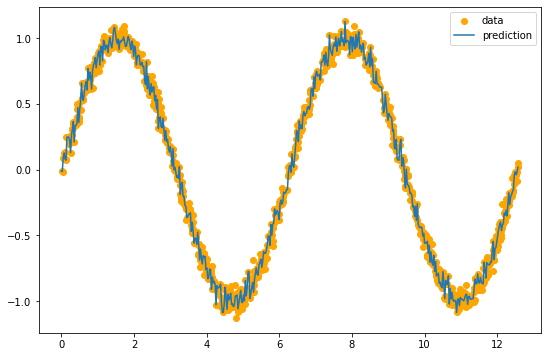

In [23]:
samples = 10**3
cycles  = 2
upper   = np.pi * 2 * cycles
from numpy.random import default_rng
rng = default_rng(1)

X = np.sort(upper * rng.random(samples))
y = np.sin(X) + rng.normal(0, 0.05, size=(len(X)))

X = X[:, np.newaxis]
print("shape of training data: ", X.shape, y.shape)

nn = nearest_neighbor()
nn.fit(X, y)

X_test = np.linspace(0, upper, 500)[:, np.newaxis]
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

plt.figure(figsize=(9,6))
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred, label='prediction')

plt.legend() ;

shape of training data:  (100, 1) (100,)


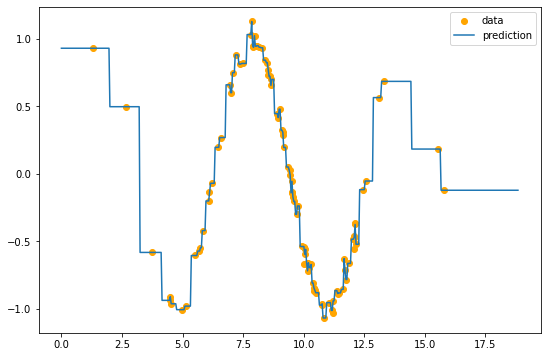

In [24]:
samples = 100
cycles  = 3
upper   = np.pi * 2 * cycles
from numpy.random import default_rng
rng = default_rng(1)

#X = np.sort(upper * rng.random(samples))
# The above case is ideal with uniform sampling, 
# as a thought excercise use the following line instead
X = np.sort(rng.normal(upper/2.0, 3.0, samples))

y = np.sin(X) + rng.normal(0, 0.05, size=(len(X)))
X = X[:, np.newaxis]
print("shape of training data: ", X.shape, y.shape)

nn = nearest_neighbor()
nn.fit(X, y)

X_test = np.linspace(0, upper, 500)[:, np.newaxis]
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

plt.figure(figsize=(9,6))
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred, label='prediction')

plt.legend();


### Running time

Predicting the class of a given input requires iteration over the entire training set of $N$ training examples.  Each step requires the computation of the distance to some training example, which requires time proportional to the number of dimensions.  In CS-speak, we say that it is $O(d)$ (see e.g. this article on [big-O notation](https://en.wikipedia.org/wiki/Big_O_notation)).  Therefore, the overall training time is proportional to $N\cdot d$, i.e. is $O(N\cdot d)$.  This can be expensive for large datasets.


### Pros and cons of nearest neighbor classification

#### Pros

* Simple to understand and implement
* Trivial to train
* Works for just about any learning problem:  classification, regression etc.
* Highly expressive - decision boundary is not limited to any particular form
* Easy to explain the results

#### Cons

* Expensive during testing
* Accuracy can be low for high dimensional data; usually not the best performing classifier
* In some cases generalization is problematic

The drawbacks of the nearest neighbor classifier can be addressed to some extent as described next.


### Improving the running time of nearest neighbor methods

Solutions for improving the running time:

* Condensing the dataset:  Retain only a relatively small fraction of the training data, as much of it is likely to be redundant.

* Efficient data structures for representing and searching the training data.  These include KD-tree, ball-tree, vantage-point tree.  These tree-based methods can reduce the search time to be $O(\log N)$.  The KD-tree and ball-tree methods are implemented in scikit-learn.



### Improving the accuracy of the basic nearest neighbor classifier

* Feature selection / removal of noisy features
* Feature normalization / rescaling
* Base the decision on multiple nearest neighbors.  This is referred to as **k-NN**.



### k-nearest neighbors (k-NN)

In this variant of the nearest neighbor algorithm the classification is decided based on the $k$ nearest neighbors of a test example.  How do we choose the predicted class label?  Typically a majority vote.  The distances can be used as weights for each vote.

Let us illustrate the difference this makes in the decision boundary:

In [25]:
from matplotlib.colors import ListedColormap

def plot_boundary(classifier, X, y, num_plots=1, plot_num=1, title=None) :
    """
    code based on:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """
    classifier.fit(X, y)
    # color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # create a two dimensional grid of points
    h = .02  # grid size
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the predictions on the grid
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(1, num_plots, plot_num)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if title is not None :
        plt.title(title)
    

Let's compare a one-nearest neighbor with k-NN:

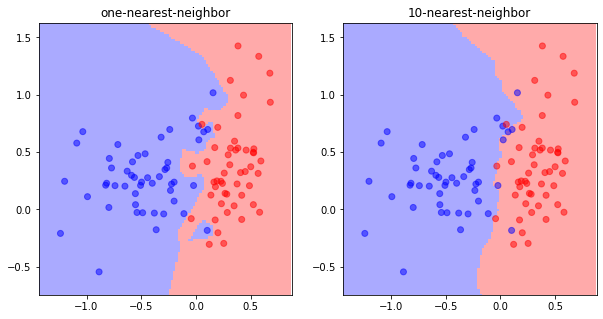

In [26]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.35, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
plt.figure(figsize=(10,5))
classifier = KNeighborsClassifier(1)
plot_boundary(classifier, X, y, 2, 1, 'one-nearest-neighbor')

classifier = KNeighborsClassifier(10)
plot_boundary(classifier, X, y, 2, 2, '10-nearest-neighbor')


## k Nearest Neighbor Example

Here is another example using a real data set - the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [27]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape

((569, 30), (569,))

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)

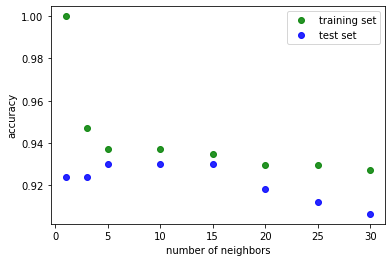

In [30]:
num_neighbors = [1,3,5,10,15,20,25,30]
test_accuracy = []
training_accuracy = []
for k in num_neighbors :
    classifier = KNeighborsClassifier(k, p=2, weights='uniform')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    test_accuracy.append(np.sum(y_pred == y_test)/len(y_test))
    y_pred = classifier.predict(X_train)
    training_accuracy.append(np.sum(y_pred == y_train)/len(y_train))
     
plt.plot(num_neighbors, training_accuracy, 'og', alpha=0.85, label = 'training set')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy');
plt.plot(num_neighbors, test_accuracy, 'ob', alpha=0.85, label = 'test set')
plt.legend();

As we can see, using the k-NN classifier with $k>1$ instead of the one-nearest neighbor classifier leads to improved accuracy fpr $k$ up to around $15$. 

Also, the **overfitting** on the training data for $k=1$ is apparent and also expected (why?).

For this data set there is also a point of diminishing returns for the $k$ values above $15$.

### Question

* Why do you expect the k-NN classifier with $k>1$ to perform better than the one-nearest neighbor classifier?

## Distance functions 

The concept of a nearest neighbor classifier is appropriate to a wide set of alternative distance measures. 

The Euclidean distance is arguably the most common, or at least first taught, of many ways for computing distance.  Recall that the Euclidean distance is defined by:
$$
d_2(\mathbf{x}, \mathbf{x}')^2 = ||\mathbf{x} - \mathbf{x}'||^2_2=
(\mathbf{x} - \mathbf{x}')^\top (\mathbf{x} - \mathbf{x}') = 
\sum_{i=1}^d (x_i - x_i')^2,
$$
where $||\cdot||_2$ is the $L_2$ or Euclidean norm of a vector.

The **Manhattan distance** is another common distance function that derives from the $L_1$ norm:
$$
d_1(\mathbf{x}, \mathbf{x}') = ||\mathbf{x} - \mathbf{x}'||_1 =
\sum_{i=1}^d |x_i - x_i'|,
$$
where $|x|$ is the absolute value.

The **Minkowski distance** is a generalization of both of these distances.  It has a parameter $p\geq 0$ and is defined by:
$$
d_p(\mathbf{x}, \mathbf{x}') = 
\left( \sum_{i=1}^d |x_i - x_i'|^p \right)^{1/p}.
$$
The Euclidean distance is a special case with $p=2$, and is also called the $L_2$ distance; the Manhattan distance is another special case with $p=1$, and is also called the $L_1$ distance.

The $L_1$ and $L_2$ distances are the most commonly used in machine learning.




<img style="padding: 0px; float:right;" alt="Circles in discrete and continuous taxicab geometry by Qef in public domain" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Manhattan_distance.svg" width="150">

<img style="padding: 10px; float:right;" alt="Taxicab geometry versus Euclidean distance by User:Psychonaut in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/de/TaxicabGeometryCircle.svg" width="150">


### The geometry of the L$_1$ distance


Let's talk about circles.  A circle is the set of points that are a fixed distance from its center.  A circle with respect to the $L_1$ distance looks quite different than what we are used to.
In fact, as shown on the right, a circle under the Manhattan distance looks like a square!  

For another interesting property consider the two points on the right:  the green line is the shortest path in the Euclidean distance; in the Manhattan distance, the shortest path is not unique, and the blue, green, and yellow paths all have the same distance.

### Decision Boundary Implications


The different geometry of the two ways of measuring distance makes their Voronoi diagrams different, which translates to a difference in the shape of the decision boundary.  

<img style="padding: 10px; float:right;" alt="Voronoi diagram by Balu Ertl CC BY-SA 4.0" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Euclidean_Voronoi_diagram.svg" width="300">

<img style="padding: 10px; float:right;" alt="Manhattan distance by Balu Ertl CC BY-SA 1.0" src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Manhattan_Voronoi_Diagram.svg" width="300">



At this point, let's see which distance works better for our example dataset.

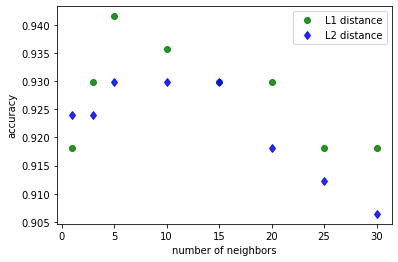

In [11]:
num_neighbors = [1,3,5,10,15,20,25,30]
accuracy_l1 = []
accuracy_l2 = []
for k in num_neighbors :
    classifier = KNeighborsClassifier(k, p=1, weights='uniform')                              
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_l1.append(np.sum(y_pred == y_test)/len(y_test))

    classifier = KNeighborsClassifier(k, p=2, weights='uniform')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_l2.append(np.sum(y_pred == y_test)/len(y_test))
    
plt.plot(num_neighbors, accuracy_l1, 'og', alpha=0.85, label='L1 distance')
plt.plot(num_neighbors, accuracy_l2, 'db', alpha=0.85, label='L2 distance')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy');


Based on this plot, you might be tempted to say that $L_1$ works better for this dataset.  But try different train-test splits, and this may no longer be the case.